In [46]:
#####################################################################
# Examples below are (more or less) taken from 
# “Python for Data Analysis" by William Wesley McKinney (O’Reilly).
# Copyright 2012 William McKinney, 978-1-449-31979-3.
#
# TOPICS COVERED:
# - Figures and Subplots
# - Saving Plots to File
# - Basic matplotlib Configuration
#####################################################################

# This notebook is written in Python 3.

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from numpy import nan as NA
import matplotlib.pyplot as plt
%matplotlib inline

## Figures and Subplots

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


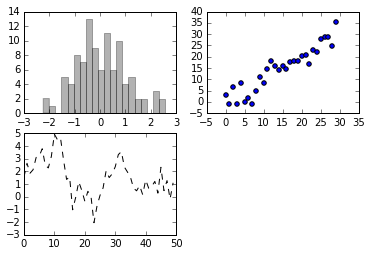

In [47]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)  # 2 by 2 figure, selecting plot 1
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')  # this plots to the last selected plot
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
plt.show()

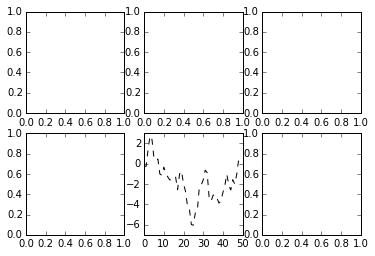

In [48]:
# an easier way to create figures with multiple subplots
fig, axes = plt.subplots(2, 3)
axes[1][1].plot(np.random.randn(50).cumsum(), 'k--')
plt.show()

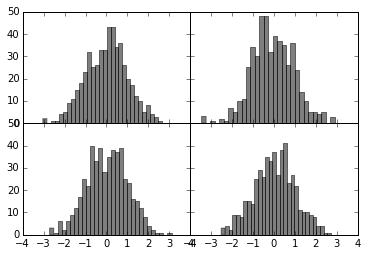

In [49]:
# spacing around subplots can be adjusted with subplots_adjust
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=30, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

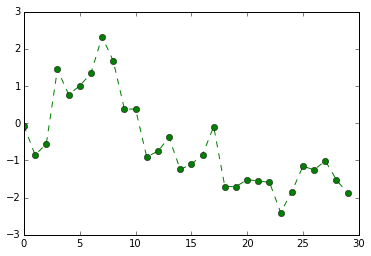

In [50]:
plt.plot(np.random.randn(30).cumsum(), color='g', linestyle='dashed', marker='o')
# plt.plot(randn(30).cumsum(), 'go--')  # more condensed version
plt.show()

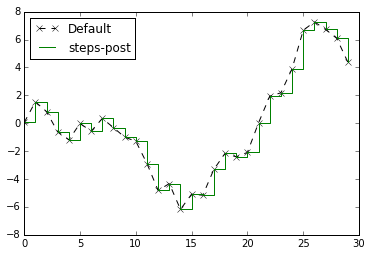

In [51]:
# it is possible to do different types of interpolations
data = np.random.randn(30).cumsum()
plt.plot(data, 'kx--', label='Default')
plt.plot(data, 'g-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')
plt.show()

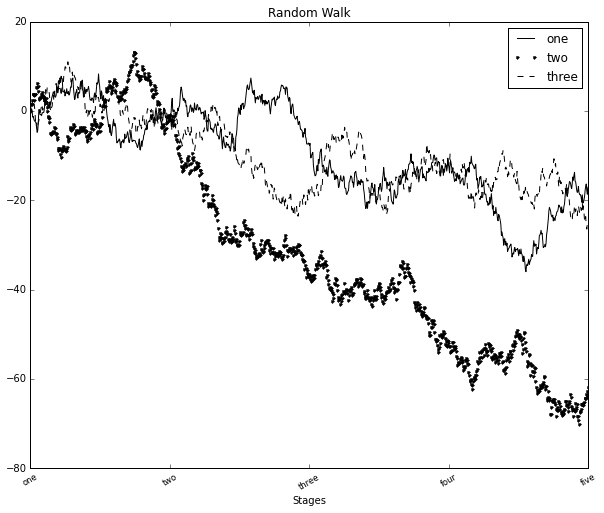

In [52]:
fig = plt.figure(figsize=(10,8)); ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k'  , label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k.' , label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='three')

ticks = ax.set_xticks([0, 250, 500, 750, 1000])  # set ticks on x-axis
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')  # set labels on x-axis
ax.set_xlabel('Stages')      # set name of x-axis
ax.set_title('Random Walk')  # set title of plot
ax.legend(loc='best')        # add legend
plt.show()

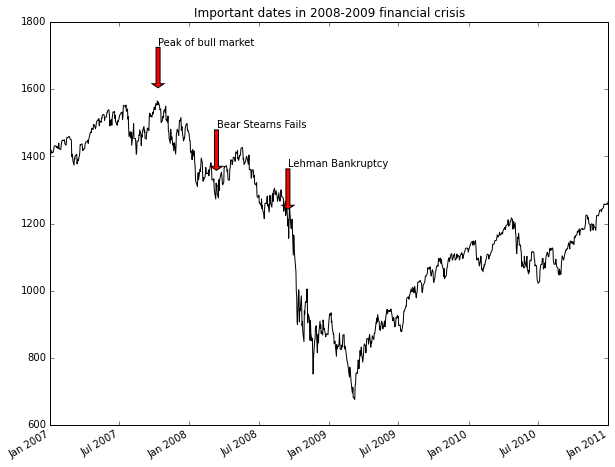

In [53]:
# An example of annotations on a figure
from datetime import datetime

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('Datasets/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in 2008-2009 financial crisis')
plt.show()

## Saving Plots to File

In [54]:
# save an SVG version to "figpath.svg"
# plt.savefig('figpath.svg')

# save a PNG version with minimal whitespace and at 400 DPI
# plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

## Basic matplotlib Configuration

In [55]:
# Use rc to customise. First argument is the component you want to customise
# (e.g. 'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend').
# After that, follow with a sequence of keyword arguments.

# plt.rc('figure', figsize=(10, 10))  # set figure to be 10 by 10

# font_options = {'family' : 'monospace',
#                 'weight' : 'bold',
#                 'size' : 'small'}
# plt.rc('font', **font_options)